## Exploraty Data Analysis (Keşifsel Veri Analizi)
- Modelleme veya hipotez testine geçmeden önce yapılan ilk adımdır.
- Amacı, veriyi tanımak, anlamak, temizleme ihtiyacını belirlemek ve olası ilişkileri keşfetmektir.
### Temel Amaçları
- Veriyi Anlamak:
    - Hangi değişkenler (features) var?
    - Hangi türdeler (sayısal, kategorik, tarih vb.)?
    - Eksik veya aykırı değer var mı?
- İlişkileri keşfetmek:
    - Değişkenler birbirleriyle nasıl ilişkililer?
    - Hangi değişkenler hedef değişkeni (target) etkileyebilir?
- Veriyi görselleştirmek:
    - Grafiklerle veri dağılımını, korelasyonları ve örüntüleri görmek.
- Veri kalitesini değerlendirmek:
    - Eksik değer oranları
    - Aykırı değerlerin varlığı
    - Tutarsız veri biçimleri (örneğin metin–sayı karışıklığı)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [6]:
# first step => data collection
data = pd.read_csv("1-WineQT.csv")

In [20]:
# second step => data inspection
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [21]:
data.shape

(1143, 13)

In [5]:
data.count()

fixed acidity           1143
volatile acidity        1143
citric acid             1143
residual sugar          1143
chlorides               1143
free sulfur dioxide     1143
total sulfur dioxide    1143
density                 1143
pH                      1143
sulphates               1143
alcohol                 1143
quality                 1143
Id                      1143
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [18]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [52]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [54]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool

In [55]:
data.groupby("quality").mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.450000          0.897500     0.211667        2.666667   
4             7.809091          0.700000     0.165758        2.566667   
5             8.161077          0.585280     0.240124        2.540476   
6             8.317749          0.504957     0.263680        2.444805   
7             8.851049          0.393671     0.386573        2.760140   
8             8.806250          0.410000     0.432500        2.643750   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.105333             8.166667             24.500000  0.997682   
4         0.094788            14.848485             40.606061  0.996669   
5         0.091770            16.612836             55.299172  0.997073   
6         0.085281            15.215368             39.941558  0.996610   
7         0.075217            14.538462             37.489510  0.996071   
8         0.070187            11.062500             29.375000  0.995553   

               pH  sulphates    alcohol           Id  
quality                                               
3        3.361667   0.550000   9.691667  1121.166667  
4        3.391212   0.637879  10.260606   692.848485  
5        3.302091   0.613375   9.902277   753.925466  
6        3.323788   0.676537  10.655339   854.625541  
7        3.287133   0.743566  11.482634   830.349650  
8        3.240625   0.766250  11.937500   797.875000

In [23]:
# third step => data cleaning
# there is no need for data cleaning in this step as there is no null data

In [25]:
# fourth step => Univariate Analysis
# all columns are numeric
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

<Axes: >

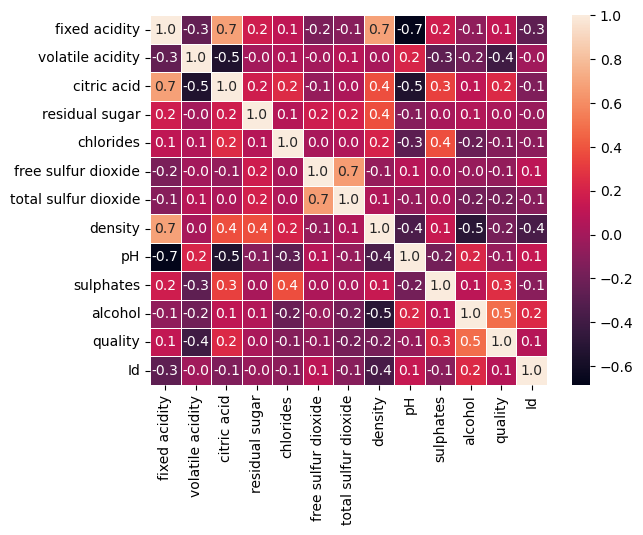

In [32]:
# fifth step => Multivariate Analysis
sns.heatmap(data=data.corr(numeric_only=True), annot=True, fmt=".1f", linewidths=0.5)

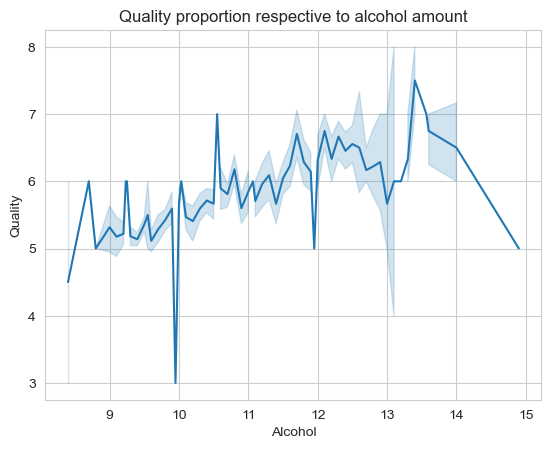

In [35]:
sns.set_style("whitegrid")
sns.lineplot(data=data, x="alcohol",y="quality")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Quality proportion respective to alcohol amount")
plt.show()

In [36]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

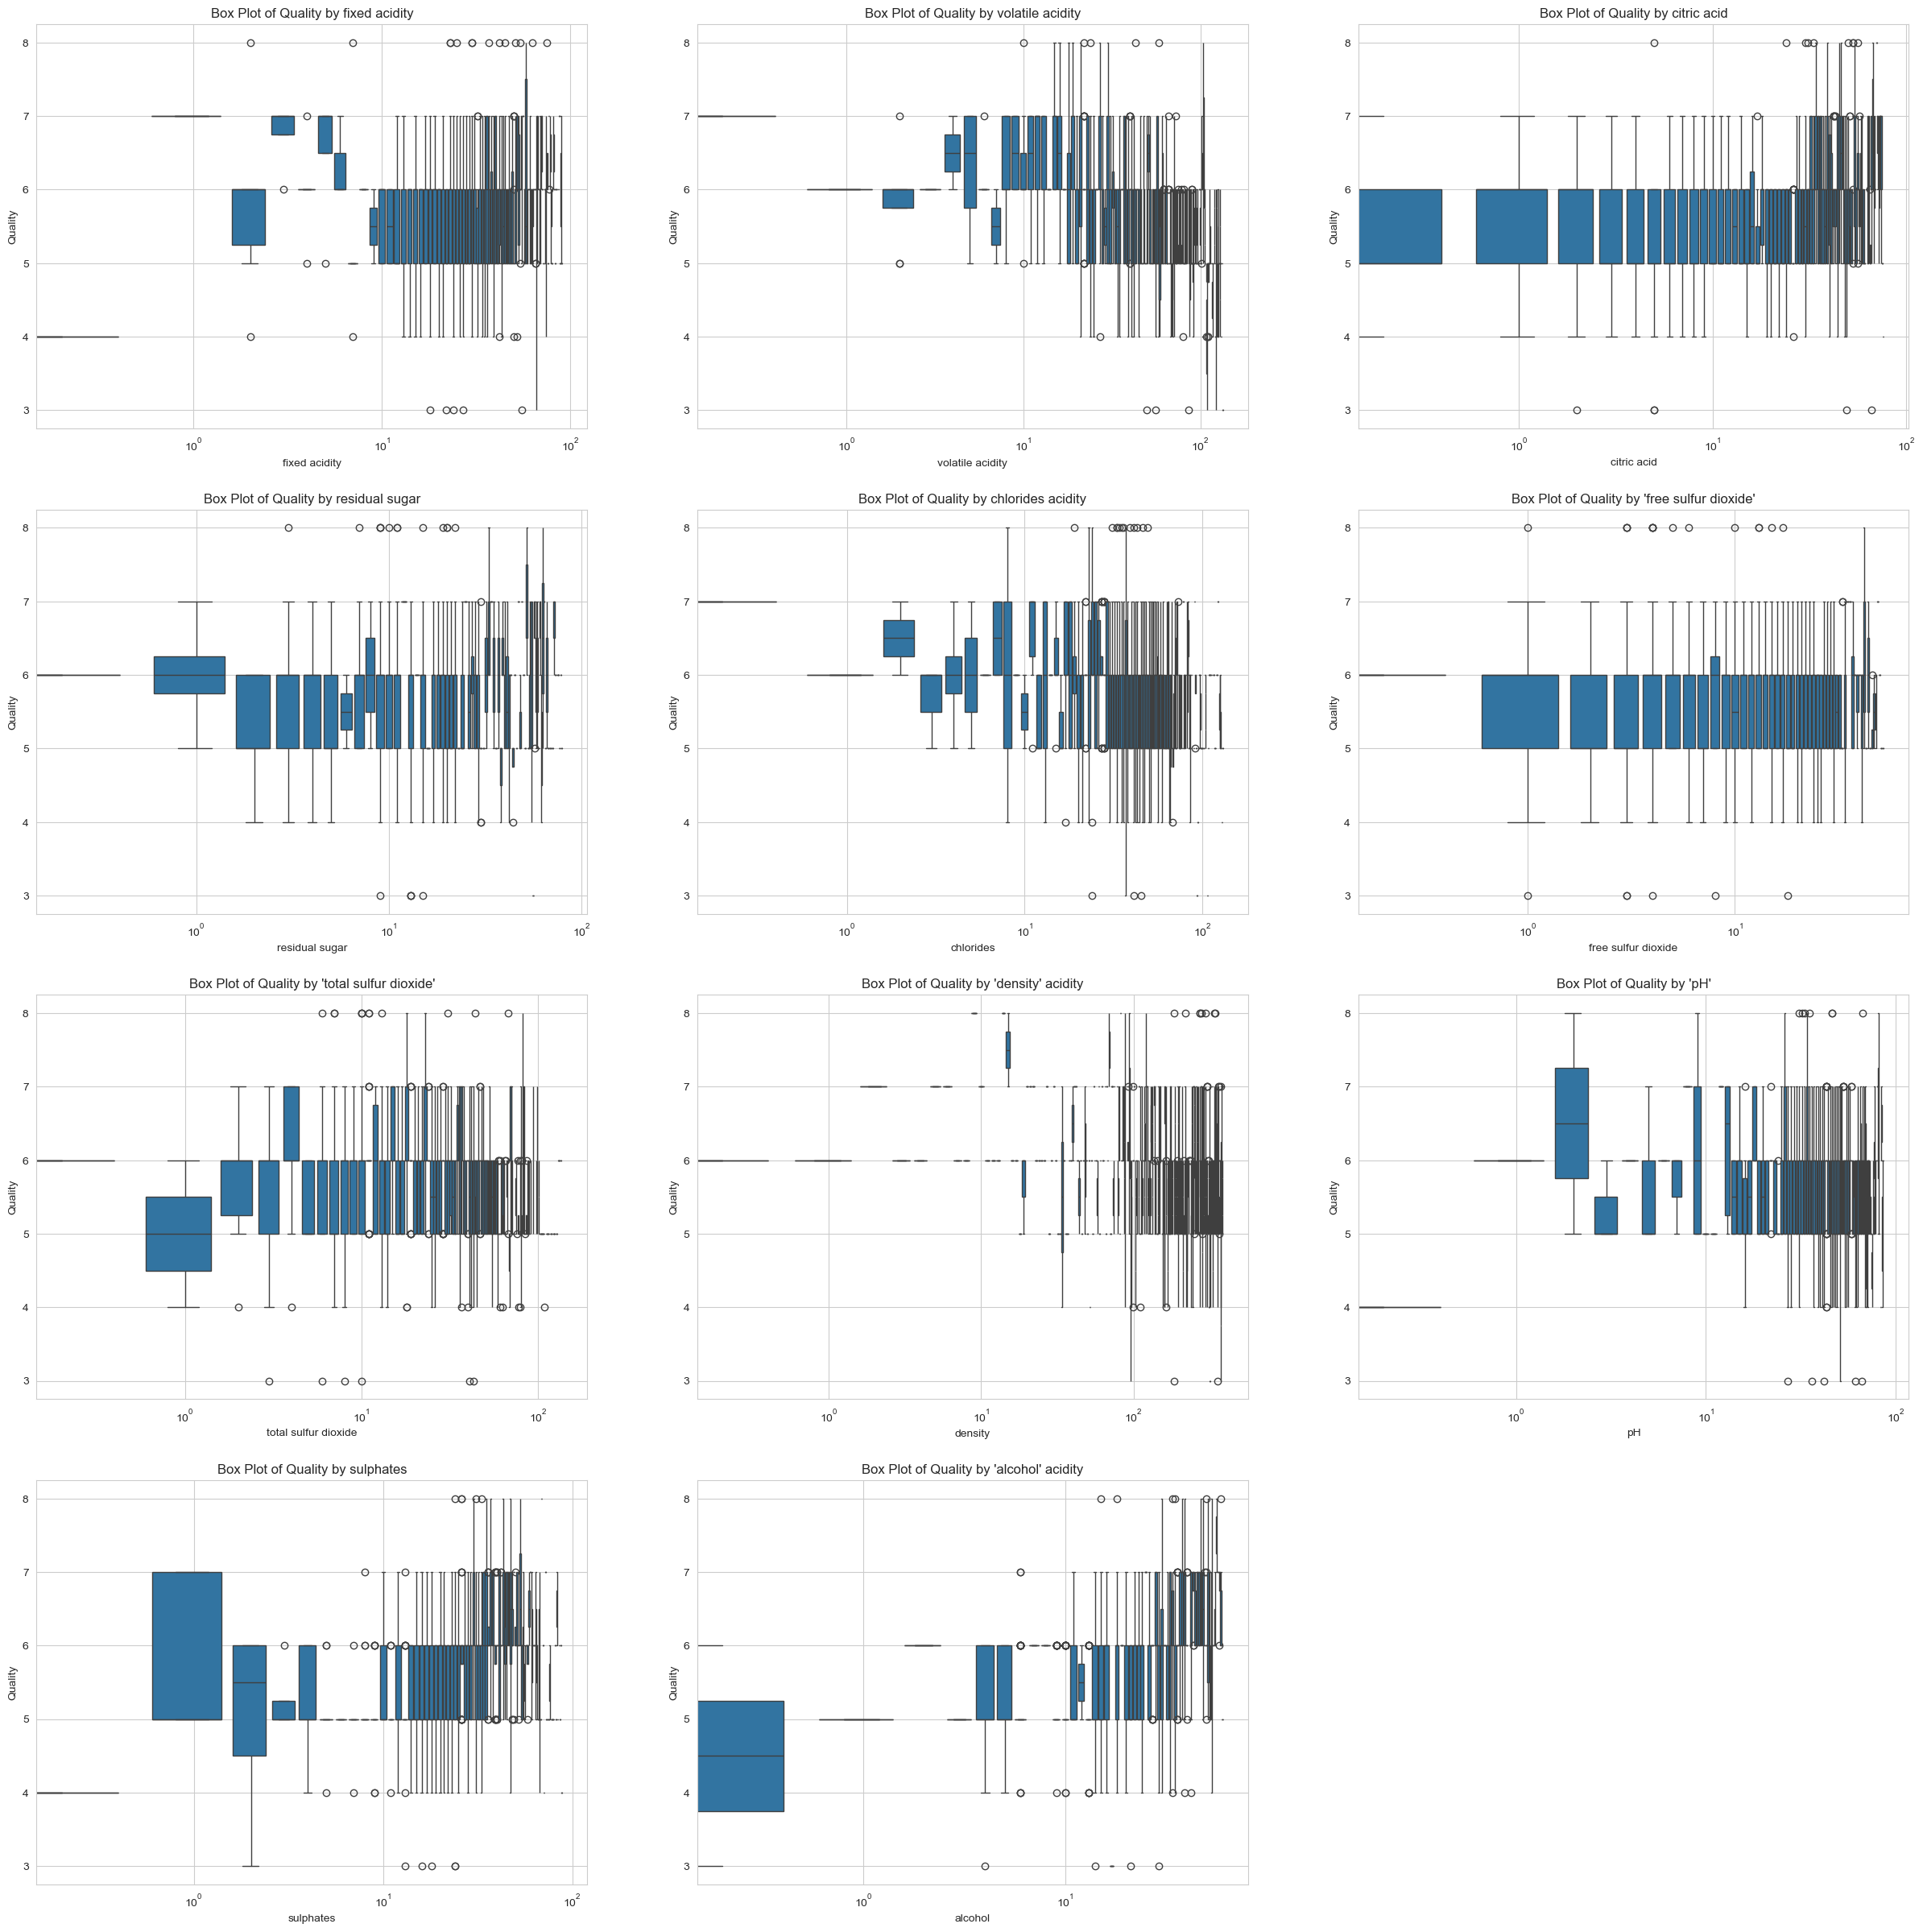

In [48]:
# sixth step => outlier detection
plt.figure(figsize=(30, 30))

# first row
plt.subplot(4,3,1)
sns.boxplot(data=data, x='fixed acidity', y="quality")
plt.title("Box Plot of Quality by fixed acidity")
plt.xlabel("fixed acidity")
plt.ylabel("Quality")
plt.xscale("log")
plt.grid(True)

plt.subplot(4,3,2)
sns.boxplot(data=data, x='volatile acidity', y="quality")
plt.title("Box Plot of Quality by volatile acidity")
plt.xlabel('volatile acidity')
plt.ylabel("Quality")
plt.xscale("log")
plt.grid(True)

plt.subplot(4,3,3)
sns.boxplot(data=data, x='citric acid', y="quality")
plt.title("Box Plot of Quality by citric acid")
plt.xlabel('citric acid')
plt.ylabel("Quality")
plt.xscale("log")
plt.grid(True)

# 2nd row
plt.subplot(4,3,4)
sns.boxplot(data=data, x='residual sugar', y="quality")
plt.title("Box Plot of Quality by residual sugar")
plt.xlabel('residual sugar')
plt.ylabel("Quality")
plt.xscale("log")
plt.grid(True)

plt.subplot(4,3,5)
sns.boxplot(data=data, x='chlorides', y="quality")
plt.title("Box Plot of Quality by chlorides acidity")
plt.xlabel('chlorides')
plt.ylabel("Quality")
plt.xscale("log")
plt.grid(True)

plt.subplot(4,3,6)
sns.boxplot(data=data, x='free sulfur dioxide', y="quality")
plt.title("Box Plot of Quality by 'free sulfur dioxide'")
plt.xlabel('free sulfur dioxide')
plt.ylabel("Quality")
plt.xscale("log")
plt.grid(True)

# 3rd row
plt.subplot(4,3,7)
sns.boxplot(data=data, x='total sulfur dioxide', y="quality")
plt.title("Box Plot of Quality by 'total sulfur dioxide'")
plt.xlabel('total sulfur dioxide')
plt.ylabel("Quality")
plt.xscale("log")
plt.grid(True)

plt.subplot(4,3,8)
sns.boxplot(data=data, x='density', y="quality")
plt.title("Box Plot of Quality by 'density' acidity")
plt.xlabel('density')
plt.ylabel("Quality")
plt.xscale("log")
plt.grid(True)

plt.subplot(4,3,9)
sns.boxplot(data=data, x='pH', y="quality")
plt.title("Box Plot of Quality by 'pH'")
plt.xlabel('pH')
plt.ylabel("Quality")
plt.xscale("log")
plt.grid(True)

# 4rd row
plt.subplot(4,3,10)
sns.boxplot(data=data, x='sulphates', y="quality")
plt.title("Box Plot of Quality by sulphates")
plt.xlabel('sulphates')
plt.ylabel("Quality")
plt.xscale("log")
plt.grid(True)

plt.subplot(4,3,11)
sns.boxplot(data=data, x='alcohol', y="quality")
plt.title("Box Plot of Quality by 'alcohol' acidity")
plt.xlabel('alcohol')
plt.ylabel("Quality")
plt.xscale("log")
plt.grid(True)

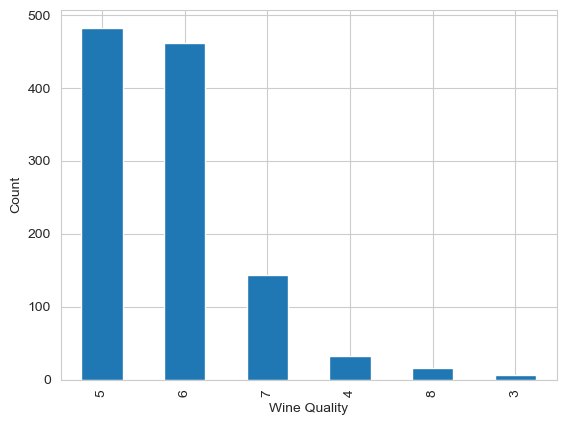

In [58]:
data["quality"].value_counts().plot(kind="bar")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

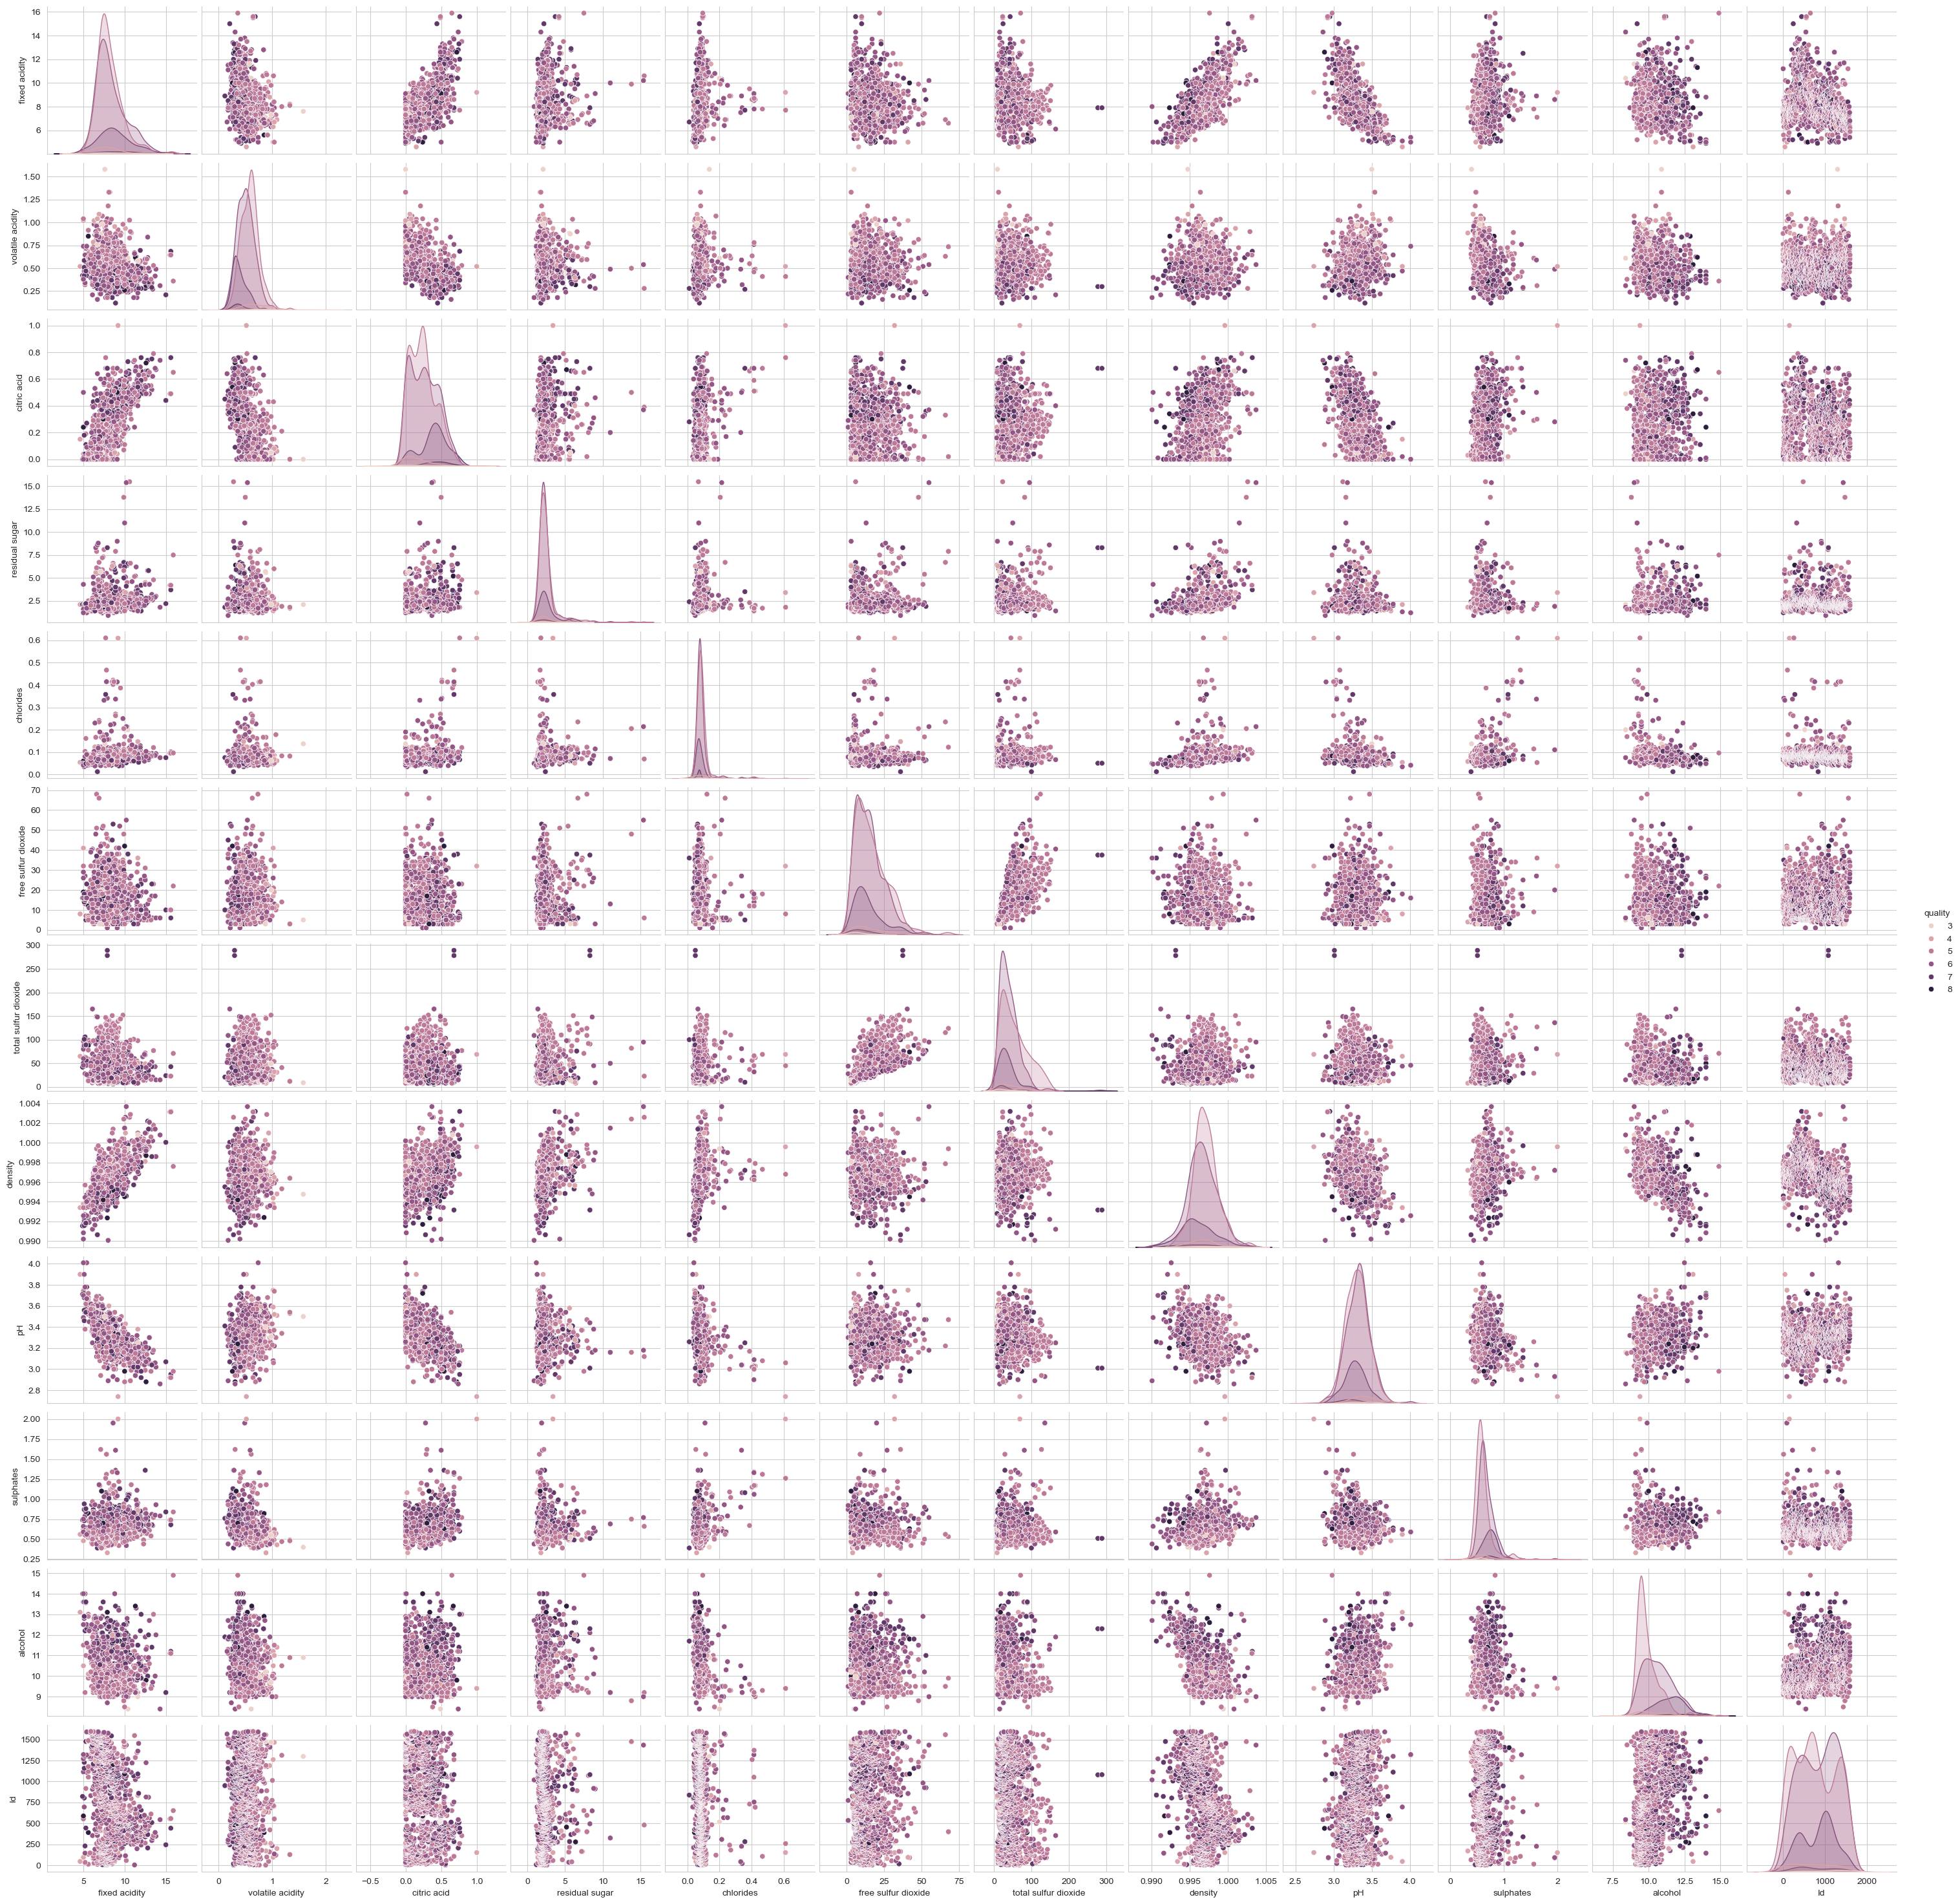

In [51]:
# last step => visualize pattern
sns.pairplot(data=data, hue="quality")

C:\Users\batuh\AppData\Local\Temp\ipykernel_13420\1183770303.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


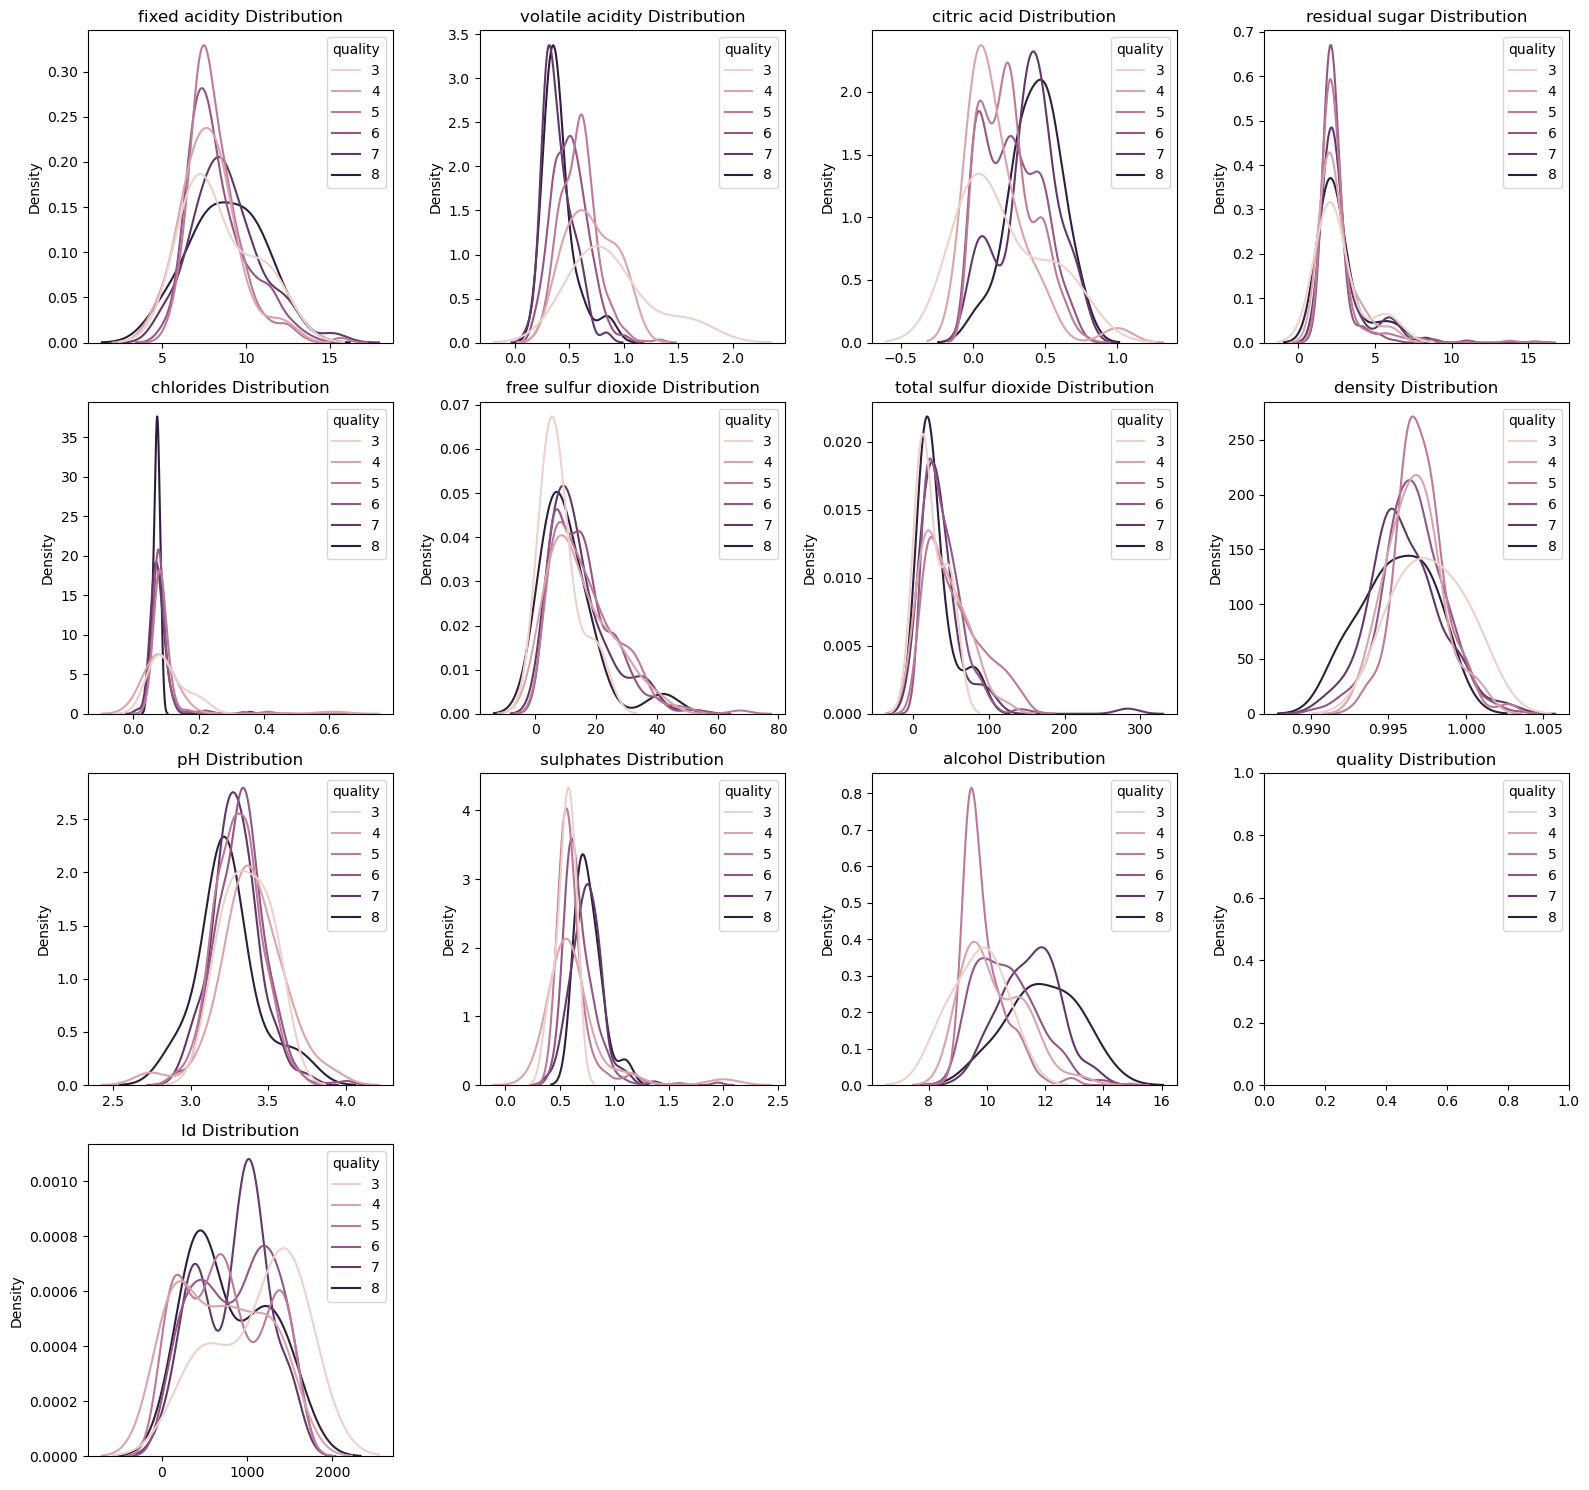

In [7]:
columns = data.columns
fig, ax = plt.subplots(4, 4, figsize=(16, 15))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    
    sns.kdeplot(
        data = data,
        x = column,
        hue=data.quality,
        ax=ax[i],
        common_norm=False
    )
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
# hide empty ones
for i in range(i+1, len(ax)):
    ax[i].axis('off')

plt.tight_layout()